In [343]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [344]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

In [345]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [346]:
df.shape

(263, 20)

In [347]:
#doğrusal regresyon Ridge modelinin eğitilmesi
ridge_model = Ridge(alpha=5).fit(X_train,y_train)


In [348]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [349]:
ridge_model.intercept_

-3.4251968687162844

In [350]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [351]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [352]:
ridge_model = Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
    

In [353]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

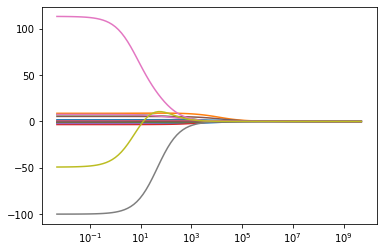

In [354]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

In [355]:
y_pred_1 = ridge_model.predict(X_train)

In [356]:
y_pred_1[0:10]

array([ 377.43897818,  802.20172846,  495.61262179,  112.53310635,
        426.2235674 , 1004.23269616,  154.7234935 ,  362.55653134,
        485.36598379,  918.70526984])

In [357]:
#train hatasi
RMSE = np.sqrt(mean_squared_error(y_train,y_pred_1))
RMSE

289.3292830531484

In [358]:
#test hatasi
y_pred_1 = ridge_model.predict(X_test)
RMSE_1 = np.sqrt(mean_squared_error(y_test,y_pred_1))
RMSE_1

357.0517922282843

In [359]:
R2_1 = r2_score(y_test,y_pred_1)

In [360]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

In [361]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [362]:

lasso_model = Lasso().fit(X_train,y_train)

C:\Users\osman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [363]:
#farkli lambda degerlerine karsilik katsayilar

In [364]:
lasso = Lasso()
coefs = []
alphas=np.random.randint(0,100000,10)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

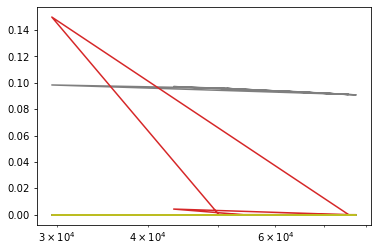

In [365]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [366]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [367]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [368]:
y_pred_2=lasso_model.predict(X_test)

In [369]:
RMSE_2=np.sqrt(mean_squared_error(y_test,y_pred_2))
RMSE_2

356.0975884554034

In [370]:
R2_2 = r2_score(y_test,y_pred_2)

In [371]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

In [372]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [373]:
enet_model = ElasticNet().fit(X_train,y_train)

C:\Users\osman\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [374]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [375]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [376]:
y_pred_3 = enet_model.predict(X_test)

In [377]:
RMSE_3 = np.sqrt(mean_squared_error(y_test,y_pred_3))

In [378]:
R2_3 = r2_score(y_test,y_pred_3)

In [379]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

# MODEL TUNING

## Ridge Model Tuning

In [380]:
ridge_cv_model = RidgeCV(cv=10).fit(X_train, y_train)

In [381]:
ridge_cv_model.coef_

array([ -1.83110238,   8.91471662,   6.95563247,  -3.2988624 ,
        -1.94058277,   5.39441854,   7.02809567,  -0.12697611,
        -0.27963511,  -0.77363301,   1.83083809,   0.7951527 ,
        -0.6715745 ,   0.26289674,   0.26332372,  -0.31549535,
        60.58610716, -82.05126656,  -3.68403032])

In [382]:
ridge_tuned = Ridge().set_params(alpha=ridge_cv_model.alpha_).fit(X_train,y_train)

In [383]:
y_pred_1_1=lasso_tuned.predict(X_test)

In [384]:
RMSE_1_1 = np.sqrt(mean_squared_error(y_test,y_pred_1_1))

In [385]:
R2_1_1 = r2_score(y_test,y_pred_1_1)

In [386]:
pd.Series(ridge_tuned.coef_,index= X_train.columns)

AtBat          -1.831102
Hits            8.914717
HmRun           6.955632
Runs           -3.298862
RBI            -1.940583
Walks           5.394419
Years           7.028096
CAtBat         -0.126976
CHits          -0.279635
CHmRun         -0.773633
CRuns           1.830838
CRBI            0.795153
CWalks         -0.671575
PutOuts         0.262897
Assists         0.263324
Errors         -0.315495
League_N       60.586107
Division_W    -82.051267
NewLeague_N    -3.684030
dtype: float64

## Lasso Model Tuning

In [387]:
lasso_cv_model = LassoCV(cv=10, max_iter = 100000).fit(X_train, y_train)

In [388]:
lasso_cv_model.alpha_

563.4670501833854

In [389]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train,y_train)

In [390]:
y_pred_2_1=lasso_tuned.predict(X_test)

In [391]:
RMSE_2_1 = np.sqrt(mean_squared_error(y_test,y_pred_2_1))

In [392]:
R2_2_1 = r2_score(y_test,y_pred_2_1)

In [393]:
pd.Series(lasso_tuned.coef_,index= X_train.columns)

AtBat         -0.000000
Hits           2.533141
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          0.520003
Years          0.000000
CAtBat        -0.188935
CHits          0.360895
CHmRun        -0.000000
CRuns          0.835617
CRBI           0.427816
CWalks         0.000527
PutOuts        0.279218
Assists        0.081443
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

## ElasticNet Model Tuning

In [394]:
enet_cv_model = ElasticNetCV(cv=10).fit(X_train,y_train)

In [395]:
enet_cv_model.alpha_

5230.7647364798695

In [396]:
enet_cv_model.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [397]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [398]:
y_pred_3_1 = enet_tuned.predict(X_test)

In [399]:
RMSE_3_1 = np.sqrt(mean_squared_error(y_test,y_pred_3_1))

In [400]:
R2_3_1 = r2_score(y_test,y_pred_3_1)

In [401]:
y_test = pd.DataFrame(y_test)
y_pred_1 = pd.DataFrame(y_pred_1)
y_pred_2 = pd.DataFrame(y_pred_2)
y_pred_3 = pd.DataFrame(y_pred_2)
y_pred_1_1 = pd.DataFrame(y_pred_1_1)
y_pred_2_1 = pd.DataFrame(y_pred_2_1)
y_pred_3_1 = pd.DataFrame(y_pred_3_1)


In [402]:
y_pred_1

,0
0,612.050847
1,695.550710
2,1013.293687
3,410.073601
4,415.459726
...,...
61,412.745738
62,995.545340
63,489.122956
64,587.682029


In [403]:
y_test = np.array(y_test)
y_test = pd.DataFrame(y_test)

In [404]:
karar_tablosu = pd.concat([y_test,y_pred_1,y_pred_2,y_pred_3],axis=1)
karar_tablosu.columns=["gercek_y","tahmin_edilen_y_ridge","tahmin_edilen_y_lasso","tahmin_edilen_y_elasticNet"]
karar_tablosu.head(10)

,gercek_y,tahmin_edilen_y_ridge,tahmin_edilen_y_lasso,tahmin_edilen_y_elasticNet
0,850.000,612.050847,609.188264,609.188264
1,277.500,695.550710,696.968107,696.968107
2,875.000,1013.293687,1009.061574,1009.061574
3,150.000,410.073601,412.227734,412.227734
4,260.000,415.459726,409.258517,409.258517
5,277.500,342.984637,344.614721,344.614721
6,210.000,661.057711,662.199136,662.199136
7,140.000,446.736255,452.938916,452.938916
8,517.143,912.335967,913.972543,913.972543
9,325.000,645.004855,646.931826,646.931826


In [405]:
karar_tablosu_tune = pd.concat([y_test,y_pred_1_1,y_pred_2_1,y_pred_3_1],axis=1)
karar_tablosu_tune.columns=["gercek_y","tune_ridge","tune_lasso","tune_elasticNet"]
karar_tablosu_tune.head(10)

,gercek_y,tune_ridge,tune_lasso,tune_elasticNet
0,850.000,610.535272,610.535272,667.854501
1,277.500,543.913476,543.913476,550.299197
2,875.000,911.713618,911.713618,853.942839
3,150.000,326.756002,326.756002,353.081961
4,260.000,544.109316,544.109316,606.287310
5,277.500,280.674523,280.674523,291.683048
6,210.000,571.528866,571.528866,499.726716
7,140.000,491.161653,491.161653,429.583345
8,517.143,885.685790,885.685790,815.631718
9,325.000,779.974721,779.974721,809.366407


In [406]:
type(RMSE_1)
RMSE_1

357.0517922282843

In [407]:
degerler_1 = {"ridge_rmse" : [RMSE_1],"lasso_rmse" : [RMSE_2],"elasticNet_rmse" : [RMSE_3],"ridge_tune":[RMSE_1_1],"lasso_tune":[RMSE_2_1],"elasticNet_tune":[RMSE_3_1]}
rmse_tablosu = pd.DataFrame.from_dict(degerler_1)
rmse_tablosu

,ridge_rmse,lasso_rmse,elasticNet_rmse,ridge_tune,lasso_tune,elasticNet_tune
0,357.051792,356.097588,357.167655,373.595723,373.595723,394.152806


Tune edilmeden önceki RMSE skorları ve Tune edildikten sonraki RMSE skorları

In [408]:
degerler_2 = {"ridge_r2" : [R2_1],"lasso_r2" : [R2_2],"elasticNet_r2" : [R2_3],"ridge_tune":[R2_1_1],"lasso_tune":[R2_2_1],"elasticNet_tune":[R2_3_1]}
r2_tablosu = pd.DataFrame.from_dict(degerler_2)
r2_tablosu

,ridge_r2,lasso_r2,elasticNet_r2,ridge_tune,lasso_tune,elasticNet_tune
0,0.411084,0.414228,0.410702,0.355246,0.355246,0.282338


Tune edilmeden önceki R2(r kare) skorları ve Tune edildikten sonraki R2(r kare) skorları

R2 ve RMSE Sonuçlarına bakılarak bu veri seti için çok Lasso veya Ridge modellerinden biri seçilebilir.